# Import Libraries

In [1]:
import numpy as np
from pyproj import CRS, Transformer, Proj, transform
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
from matplotlib import animation, rc
from IPython.display import HTML
plt.rcParams['animation.ffmpeg_path'] = '/usr/local/bin/ffmpeg'
import pyodbc as pyo
import datetime
from datetime import date, timedelta
import time
import seaborn as sns

%matplotlib inline

# Read Shape Files

In [2]:
Massachusetts=gpd.read_file('/Users/sfolan/Downloads/final_stellwagen_shp/Massachusetts.shp')
Bathymetry=gpd.read_file('/Users/sfolan/Downloads/final_stellwagen_shp/bathymetry.shp')
Stellwagen=gpd.read_file('/Users/sfolan/Downloads/stellb/stellba1.shp')

# Read AIS csv + Whale Data

In [3]:
ship_traffic04=pd.read_csv('/Users/sfolan/Downloads/AIS_ASCII_by_UTM_Month-2/2016/AIS_2016_04_Zone19.csv')
ship_traffic05=pd.read_csv('/Users/sfolan/Downloads/AIS_ASCII_by_UTM_Month-6/2016/AIS_2016_05_Zone19.csv')
ship_traffic06=pd.read_csv('/Users/sfolan/Downloads/AIS_ASCII_by_UTM_Month-7/2016/AIS_2016_06_Zone19.csv')
ship_traffic07=pd.read_csv('/Users/sfolan/Downloads/AIS_ASCII_by_UTM_Month-9/2016/AIS_2016_07_Zone19.csv')
ship_traffic08=pd.read_csv('/Users/sfolan/Downloads/AIS_ASCII_by_UTM_Month-8/2016/AIS_2016_08_Zone19.csv')
ship_traffic09=pd.read_csv('/Users/sfolan/Downloads/AIS_ASCII_by_UTM_Month-5/2016/AIS_2016_09_Zone19.csv')
ship_traffic10=pd.read_csv('/Users/sfolan/Downloads/AIS_ASCII_by_UTM_Month-4/2016/AIS_2016_10_Zone19.csv')
ship_traffic11=pd.read_csv('/Users/sfolan/Downloads/AIS_ASCII_by_UTM_Month-3/2016/AIS_2016_11_Zone19.csv')

In [4]:
df=pd.read_csv('/Users/sfolan/Downloads/BHC Sightings Database.xlsx - Sightings Data.csv')

In [5]:
#df[df["Date"]=="4/13/2018"]

In [6]:
df["Date"].replace("4/13/2018", "2018-04-13")
#df[df["Date"]=="2018-04-13"]

0        2013-03-30
1        2013-03-30
2        2013-03-30
3        2013-03-30
4        2013-03-30
            ...    
33297    2019-11-15
33298    2019-11-15
33299    2019-11-15
33300    2019-11-15
33301    2019-11-15
Name: Date, Length: 33302, dtype: object

In [7]:
df["Month"]=pd.DatetimeIndex(df["Date"]).month
#df["Month"]

In [8]:
new_df=df.groupby("Month")
#new_df.first()

In [9]:
#Split into months
count=0
df04=new_df.get_group(4)
df05=new_df.get_group(5)
df06=new_df.get_group(6)
df07=new_df.get_group(7)
df08=new_df.get_group(8)
df09=new_df.get_group(9)
df10=new_df.get_group(10)
df11=new_df.get_group(11)
#df11

In [10]:
Whale_list=[df04, df05, df06, df07, df08, df09, df10, df11]

In [11]:
AIS_list=[ship_traffic04,ship_traffic05,ship_traffic06, ship_traffic07, ship_traffic08, ship_traffic09, ship_traffic10, ship_traffic11]

# Convert to UTM 'epsg:26986'

In [12]:
x=[0,1,2,3,4,5,6,7,8,9,0]
count=0
for i in x:
    x[count]=10
    count+=1
print(x)

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


In [13]:
#For whale Data
inProj=Proj('epsg:4326')
outProj=Proj('epsg:26986')
count=0
for x in Whale_list:
    xx, yy=transform(inProj, outProj,x["Decimal lat"].values, x["Decimal long"].values)
    Whale_list[count]["x-coordinates"]=xx
    Whale_list[count]["y-coordinates"]=yy
    count+=1

<ipython-input-13-899033a63a8b>:6: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  xx, yy=transform(inProj, outProj,x["Decimal lat"].values, x["Decimal long"].values)
<ipython-input-13-899033a63a8b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Whale_list[count]["x-coordinates"]=xx
<ipython-input-13-899033a63a8b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Whale_list[count]["y-coordinates"]=yy


In [14]:
#For AIS data
inProj=Proj('epsg:4269')
outProj=Proj('epsg:26986')
count=0
for x in AIS_list:
    xxx,yyy=transform(inProj, outProj, x["LAT"].values, x["LON"].values)
    AIS_list[count]["x-coordinates"]=xxx
    AIS_list[count]["y-coordinates"]=yyy
    count+=1

<ipython-input-14-f533b8e87031>:6: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  xxx,yyy=transform(inProj, outProj, x["LAT"].values, x["LON"].values)


In [15]:
ship_traffic04=ship_traffic04[(ship_traffic04['x-coordinates']>=175000)&(ship_traffic04['x-coordinates']<=375000)&(ship_traffic04['y-coordinates']>=800000)&(ship_traffic04['y-coordinates']<=950000)].sample(1000000)
ship_traffic05=ship_traffic05[(ship_traffic05['x-coordinates']>=175000)&(ship_traffic05['x-coordinates']<=375000)&(ship_traffic05['y-coordinates']>=800000)&(ship_traffic05['y-coordinates']<=950000)].sample(1000000)
ship_traffic06=ship_traffic06[(ship_traffic06['x-coordinates']>=175000)&(ship_traffic06['x-coordinates']<=375000)&(ship_traffic06['y-coordinates']>=800000)&(ship_traffic06['y-coordinates']<=950000)].sample(1000000)
ship_traffic07=ship_traffic07[(ship_traffic07['x-coordinates']>=175000)&(ship_traffic07['x-coordinates']<=375000)&(ship_traffic07['y-coordinates']>=800000)&(ship_traffic07['y-coordinates']<=950000)].sample(1000000)
ship_traffic08=ship_traffic08[(ship_traffic08['x-coordinates']>=175000)&(ship_traffic08['x-coordinates']<=375000)&(ship_traffic08['y-coordinates']>=800000)&(ship_traffic08['y-coordinates']<=950000)].sample(1000000)
ship_traffic09=ship_traffic09[(ship_traffic09['x-coordinates']>=175000)&(ship_traffic09['x-coordinates']<=375000)&(ship_traffic09['y-coordinates']>=800000)&(ship_traffic09['y-coordinates']<=950000)].sample(1000000)
ship_traffic10=ship_traffic10[(ship_traffic10['x-coordinates']>=175000)&(ship_traffic10['x-coordinates']<=375000)&(ship_traffic10['y-coordinates']>=800000)&(ship_traffic10['y-coordinates']<=950000)].sample(1000000)
ship_traffic11=ship_traffic11[(ship_traffic11['x-coordinates']>=175000)&(ship_traffic11['x-coordinates']<=375000)&(ship_traffic11['y-coordinates']>=800000)&(ship_traffic11['y-coordinates']<=950000)].sample(1000000)

# Create POINTS

In [34]:
#For Whale Data

#df04
geometry=[Point(xy) for xy in zip(df04["x-coordinates"], df04["y-coordinates"])]
geometry[:3]
crs=CRS.from_epsg(2698)
geo_df04=gpd.GeoDataFrame(df04, crs=crs, geometry=geometry)
#df05
geometry=[Point(xy) for xy in zip(df05["x-coordinates"], df05["y-coordinates"])]
geometry[:3]
crs=CRS.from_epsg(2698)
geo_df05=gpd.GeoDataFrame(df05, crs=crs, geometry=geometry)
#df06
geometry=[Point(xy) for xy in zip(df06["x-coordinates"], df06["y-coordinates"])]
geometry[:3]
crs=CRS.from_epsg(2698)
geo_df06=gpd.GeoDataFrame(df06, crs=crs, geometry=geometry)
#df07
geometry=[Point(xy) for xy in zip(df07["x-coordinates"], df07["y-coordinates"])]
geometry[:3]
crs=CRS.from_epsg(2698)
geo_df07=gpd.GeoDataFrame(df07, crs=crs, geometry=geometry)
#df08
geometry=[Point(xy) for xy in zip(df08["x-coordinates"], df08["y-coordinates"])]
geometry[:3]
crs=CRS.from_epsg(2698)
geo_df08=gpd.GeoDataFrame(df08, crs=crs, geometry=geometry)
#df09
geometry=[Point(xy) for xy in zip(df09["x-coordinates"], df09["y-coordinates"])]
geometry[:3]
crs=CRS.from_epsg(2698)
geo_df09=gpd.GeoDataFrame(df09, crs=crs, geometry=geometry)
#df10
geometry=[Point(xy) for xy in zip(df10["x-coordinates"], df10["y-coordinates"])]
geometry[:3]
crs=CRS.from_epsg(2698)
geo_df10=gpd.GeoDataFrame(df10, crs=crs, geometry=geometry)
#df11
geometry=[Point(xy) for xy in zip(df11["x-coordinates"], df11["y-coordinates"])]
geometry[:3]
crs=CRS.from_epsg(2698)
geo_df11=gpd.GeoDataFrame(df11, crs=crs, geometry=geometry)
#geo_df10

In [17]:
#For AIS data

#ship_traffic04
AIS=[Point(xy) for xy in zip(ship_traffic04["x-coordinates"], ship_traffic04["y-coordinates"])]
AIS[:3]
crs=CRS.from_epsg(2698)
geo_ship_traffic04=gpd.GeoDataFrame(ship_traffic04, crs=crs, geometry=AIS)
#ship_traffic05
AIS=[Point(xy) for xy in zip(ship_traffic05["x-coordinates"], ship_traffic05["y-coordinates"])]
AIS[:3]
crs=CRS.from_epsg(2698)
geo_ship_traffic05=gpd.GeoDataFrame(ship_traffic05, crs=crs, geometry=AIS)
#ship_traffic06
AIS=[Point(xy) for xy in zip(ship_traffic06["x-coordinates"], ship_traffic06["y-coordinates"])]
AIS[:3]
crs=CRS.from_epsg(2698)
geo_ship_traffic06=gpd.GeoDataFrame(ship_traffic06, crs=crs, geometry=AIS)
#ship_traffic07
AIS=[Point(xy) for xy in zip(ship_traffic07["x-coordinates"], ship_traffic07["y-coordinates"])]
AIS[:3]
crs=CRS.from_epsg(2698)
geo_ship_traffic07=gpd.GeoDataFrame(ship_traffic07, crs=crs, geometry=AIS)
#ship_traffic08
AIS=[Point(xy) for xy in zip(ship_traffic08["x-coordinates"], ship_traffic08["y-coordinates"])]
AIS[:3]
crs=CRS.from_epsg(2698)
geo_ship_traffic08=gpd.GeoDataFrame(ship_traffic08, crs=crs, geometry=AIS)
#ship_traffic09
AIS=[Point(xy) for xy in zip(ship_traffic09["x-coordinates"], ship_traffic09["y-coordinates"])]
AIS[:3]
crs=CRS.from_epsg(2698)
geo_ship_traffic09=gpd.GeoDataFrame(ship_traffic09, crs=crs, geometry=AIS)
#ship_traffic10
AIS=[Point(xy) for xy in zip(ship_traffic10["x-coordinates"], ship_traffic10["y-coordinates"])]
AIS[:3]
crs=CRS.from_epsg(2698)
geo_ship_traffic10=gpd.GeoDataFrame(ship_traffic10, crs=crs, geometry=AIS)
#ship_traffic11
AIS=[Point(xy) for xy in zip(ship_traffic11["x-coordinates"], ship_traffic11["y-coordinates"])]
AIS[:3]
crs=CRS.from_epsg(2698)
geo_ship_traffic11=gpd.GeoDataFrame(ship_traffic11, crs=crs, geometry=AIS)
#geo_ship_traffic07

## All data used is from the corresponding month in 2016 to get an average of the 2013-2019 timeframe

# April with Ship Traffic

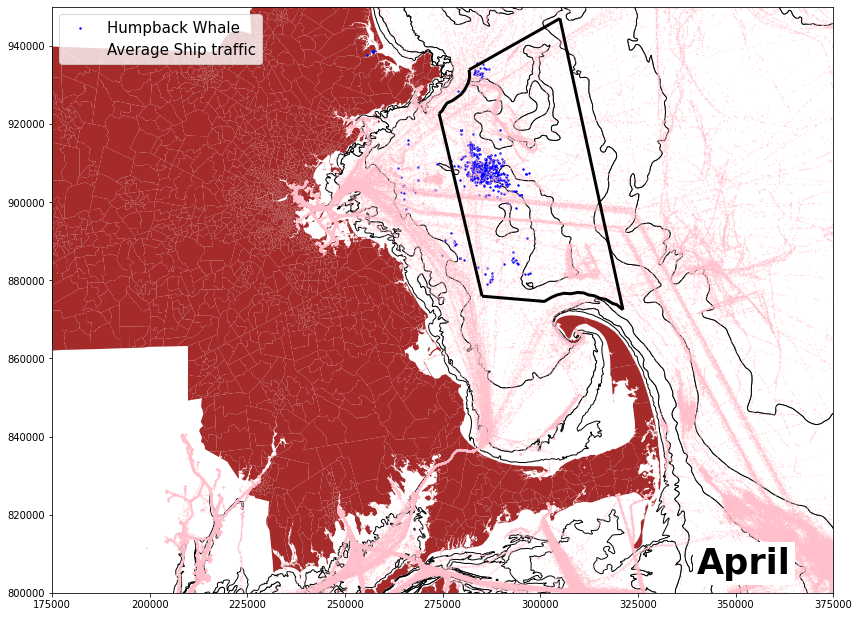

In [18]:
fg, ax =plt.subplots(figsize=(14,14))
ax.set_xlim(175000, 375000)
ax.set_ylim(800000, 950000)
Bathymetry.plot(ax=ax, facecolor="white", edgecolor='black')
Massachusetts.plot(ax=ax, facecolor="brown")
Stellwagen.plot(ax=ax, facecolor='none',edgecolor='black', linewidth=3.0)
geo_df04[geo_df04['Sp']=="MN"].plot(ax=ax, markersize=2, color="blue", marker="o", label="Humpback Whale")
geo_ship_traffic04.plot(ax=ax, markersize=1, color="pink", marker=".", label="Average Ship traffic", alpha=.4)
plt.text(340000,805000, 'April', fontsize=35, backgroundcolor="white", weight="bold")
plt.legend(prop={'size': 15})

# May with Ship Traffic

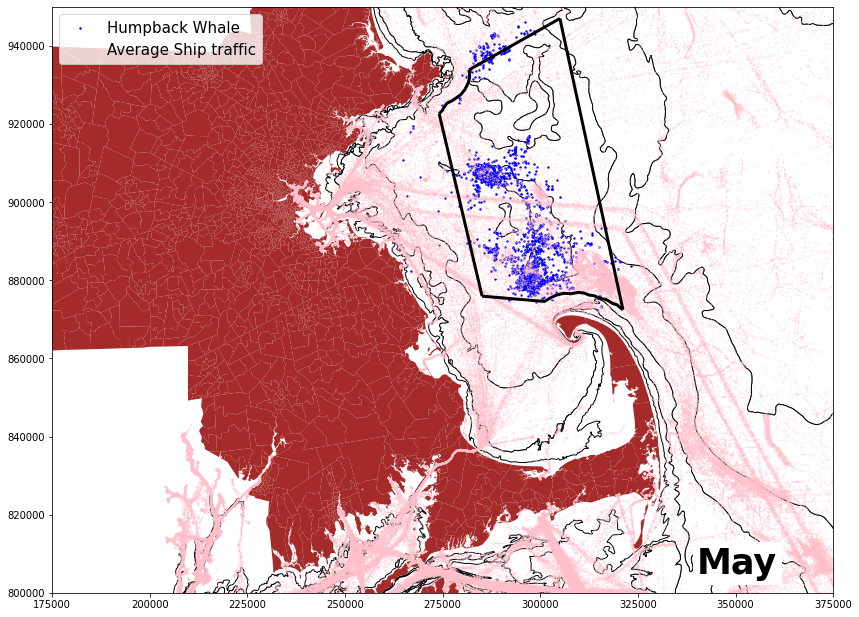

In [19]:
fg, ax =plt.subplots(figsize=(14,14))
ax.set_xlim(175000, 375000)
ax.set_ylim(800000, 950000)
Bathymetry.plot(ax=ax, facecolor="white", edgecolor='black')
Massachusetts.plot(ax=ax, facecolor="brown")
Stellwagen.plot(ax=ax, facecolor='none',edgecolor='black', linewidth=3.0)
geo_df05[geo_df05['Sp']=="MN"].plot(ax=ax, markersize=2, color="blue", marker="o", label="Humpback Whale")
geo_ship_traffic05.plot(ax=ax, markersize=1, color="pink", marker=".", label="Average Ship traffic", alpha=.4)
plt.text(340000,805000, 'May', fontsize=35, backgroundcolor="white", weight="bold")
plt.legend(prop={'size': 15})

# June with Ship Traffic

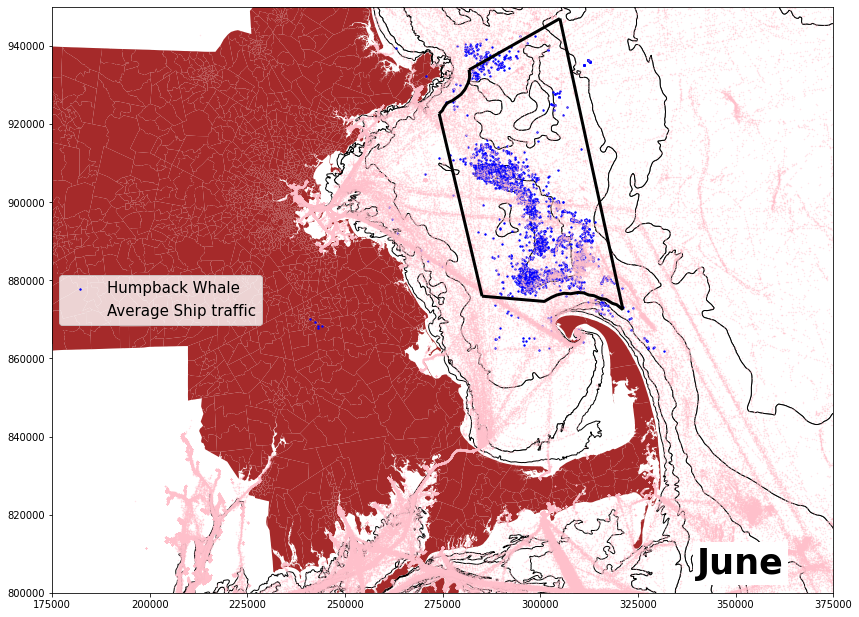

In [20]:
fg, ax =plt.subplots(figsize=(14,14))
ax.set_xlim(175000, 375000)
ax.set_ylim(800000, 950000)
Bathymetry.plot(ax=ax, facecolor="white", edgecolor='black')
Massachusetts.plot(ax=ax, facecolor="brown")
Stellwagen.plot(ax=ax, facecolor='none',edgecolor='black', linewidth=3.0)
geo_df06[geo_df06['Sp']=="MN"].plot(ax=ax, markersize=2, color="blue", marker="o", label="Humpback Whale")
geo_ship_traffic06.plot(ax=ax, markersize=1, color="pink", marker=".", label="Average Ship traffic", alpha=.4)
plt.text(340000,805000, 'June', fontsize=35, backgroundcolor="white", weight="bold")
plt.legend(prop={'size': 15})

# July with Ship Traffic

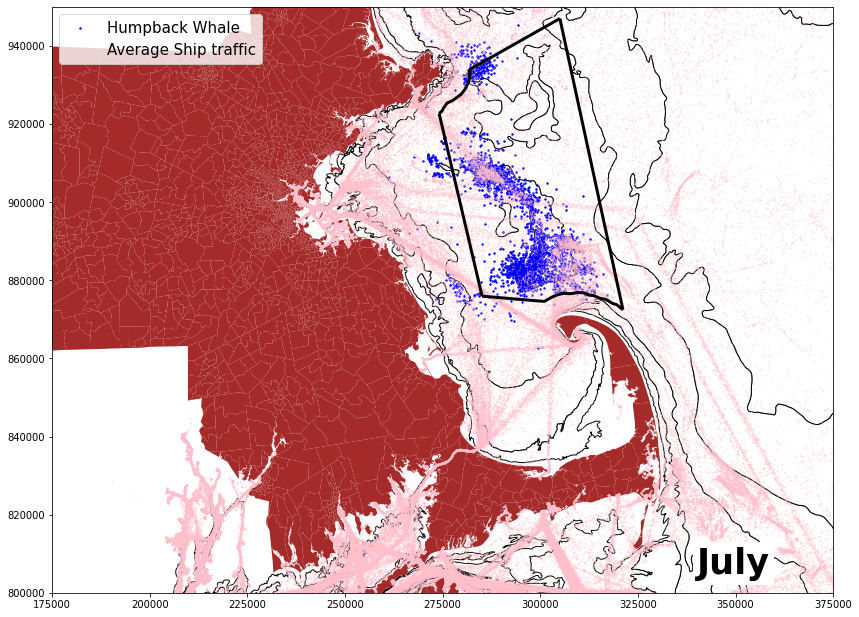

In [21]:
fg, ax =plt.subplots(figsize=(14,14))
ax.set_xlim(175000, 375000)
ax.set_ylim(800000, 950000)
Bathymetry.plot(ax=ax, facecolor="white", edgecolor='black')
Massachusetts.plot(ax=ax, facecolor="brown")
Stellwagen.plot(ax=ax, facecolor='none',edgecolor='black', linewidth=3.0)
geo_df07[geo_df07['Sp']=="MN"].plot(ax=ax, markersize=2, color="blue", marker="o", label="Humpback Whale")
geo_ship_traffic07.plot(ax=ax, markersize=1, color="pink", marker=".", label="Average Ship traffic", alpha=.4)
plt.text(340000,805000, 'July', fontsize=35, backgroundcolor="white", weight="bold")
plt.legend(prop={'size': 15})

# August with Ship Traffic

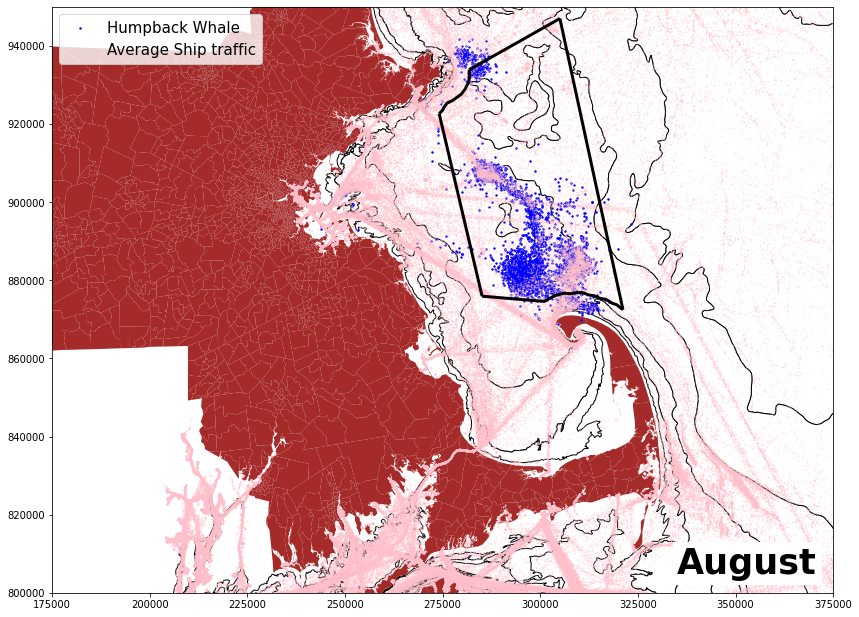

In [22]:
fg, ax =plt.subplots(figsize=(14,14))
ax.set_xlim(175000, 375000)
ax.set_ylim(800000, 950000)
Bathymetry.plot(ax=ax, facecolor="white", edgecolor='black')
Massachusetts.plot(ax=ax, facecolor="brown")
Stellwagen.plot(ax=ax, facecolor='none',edgecolor='black', linewidth=3.0)
geo_df08[geo_df08['Sp']=="MN"].plot(ax=ax, markersize=2, color="blue", marker="o", label="Humpback Whale")
geo_ship_traffic08.plot(ax=ax, markersize=1, color="pink", marker=".", label="Average Ship traffic", alpha=.4)
plt.text(335000,805000, 'August', fontsize=35, backgroundcolor="white", weight="bold")
plt.legend(prop={'size': 15})

# September with Ship Traffic

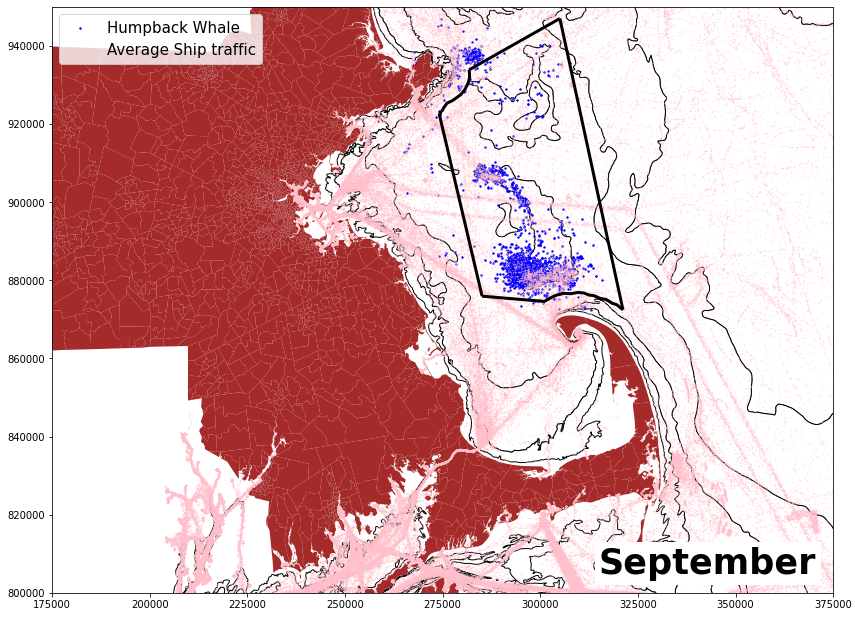

In [23]:
fg, ax =plt.subplots(figsize=(14,14))
ax.set_xlim(175000, 375000)
ax.set_ylim(800000, 950000)
Bathymetry.plot(ax=ax, facecolor="white", edgecolor='black')
Massachusetts.plot(ax=ax, facecolor="brown")
Stellwagen.plot(ax=ax, facecolor='none',edgecolor='black', linewidth=3.0)
geo_df09[geo_df09['Sp']=="MN"].plot(ax=ax, markersize=2, color="blue", marker="o", label="Humpback Whale")
geo_ship_traffic09.plot(ax=ax, markersize=1, color="pink", marker=".", label="Average Ship traffic", alpha=.4)
plt.text(315000,805000, 'September', fontsize=35, backgroundcolor="white", weight="bold")
plt.legend(prop={'size': 15})

# October with Ship Traffic

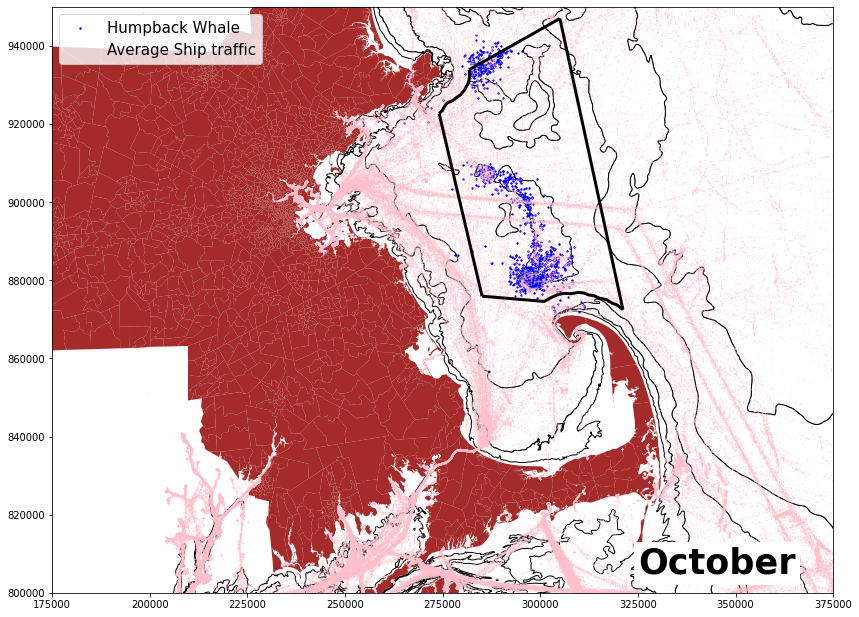

In [24]:
fg, ax =plt.subplots(figsize=(14,14))
ax.set_xlim(175000, 375000)
ax.set_ylim(800000, 950000)
Bathymetry.plot(ax=ax, facecolor="white", edgecolor='black')
Massachusetts.plot(ax=ax, facecolor="brown")
Stellwagen.plot(ax=ax, facecolor='none',edgecolor='black', linewidth=3.0)
geo_df10[geo_df10['Sp']=="MN"].plot(ax=ax, markersize=2, color="blue", marker="o", label="Humpback Whale")
geo_ship_traffic10.plot(ax=ax, markersize=1, color="pink", marker=".", label="Average Ship traffic", alpha=.4)
plt.text(325000,805000, 'October', fontsize=35, backgroundcolor="white", weight="bold")
plt.legend(prop={'size': 15})

# November with Ship Traffic

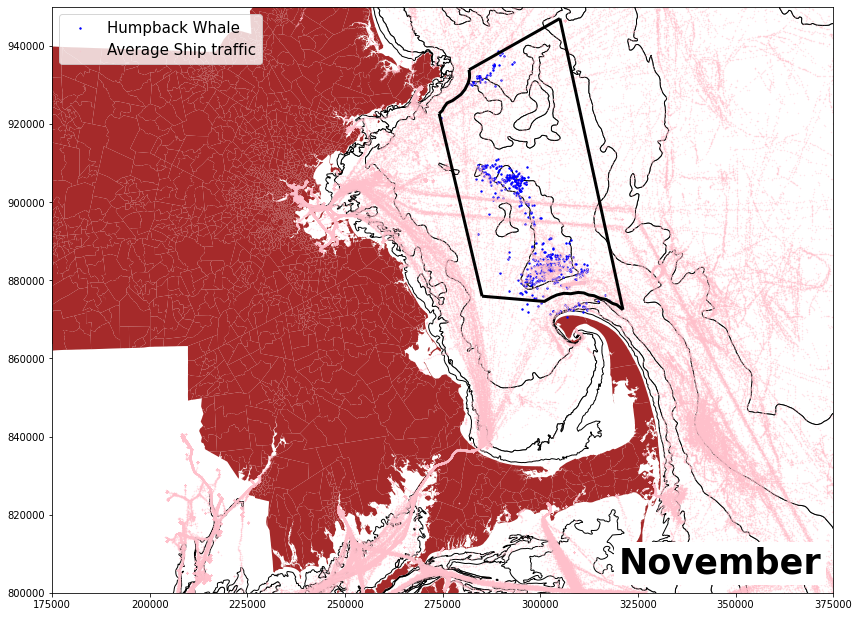

In [25]:
fg, ax =plt.subplots(figsize=(14,14))
ax.set_xlim(175000, 375000)
ax.set_ylim(800000, 950000)
Bathymetry.plot(ax=ax, facecolor="white", edgecolor='black')
Massachusetts.plot(ax=ax, facecolor="brown")
Stellwagen.plot(ax=ax, facecolor='none',edgecolor='black', linewidth=3.0)
geo_df11[geo_df11['Sp']=="MN"].plot(ax=ax, markersize=2, color="blue", marker="o", label="Humpback Whale")
geo_ship_traffic11.plot(ax=ax, markersize=1, color="pink", marker=".", label="Average Ship traffic", alpha=.4)
plt.text(320000,805000, 'November', fontsize=35, backgroundcolor="white", weight="bold")
plt.legend(prop={'size': 15})

# Whales without ships

# April

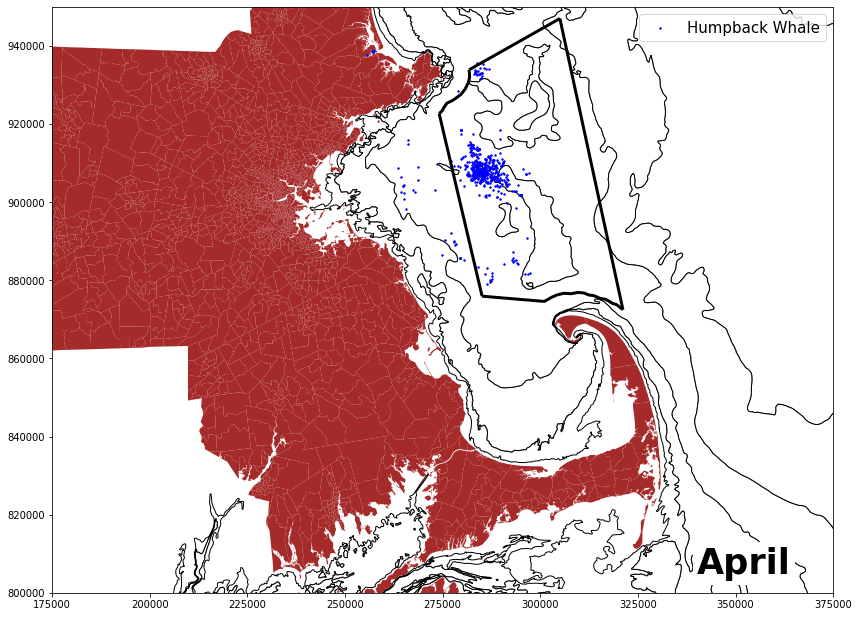

In [26]:
fg, ax =plt.subplots(figsize=(14,14))
ax.set_xlim(175000, 375000)
ax.set_ylim(800000, 950000)
Bathymetry.plot(ax=ax, facecolor="white", edgecolor='black')
Massachusetts.plot(ax=ax, facecolor="brown")
Stellwagen.plot(ax=ax, facecolor='none',edgecolor='black', linewidth=3.0)
geo_df04[geo_df04['Sp']=="MN"].plot(ax=ax, markersize=2, color="blue", marker="o", label="Humpback Whale")
#geo_ship_traffic04.plot(ax=ax, markersize=1, color="pink", marker=".", label="Average Ship traffic", alpha=.4)
plt.text(340000,805000, 'April', fontsize=35, backgroundcolor="white", weight="bold")
plt.legend(prop={'size': 15})

# May

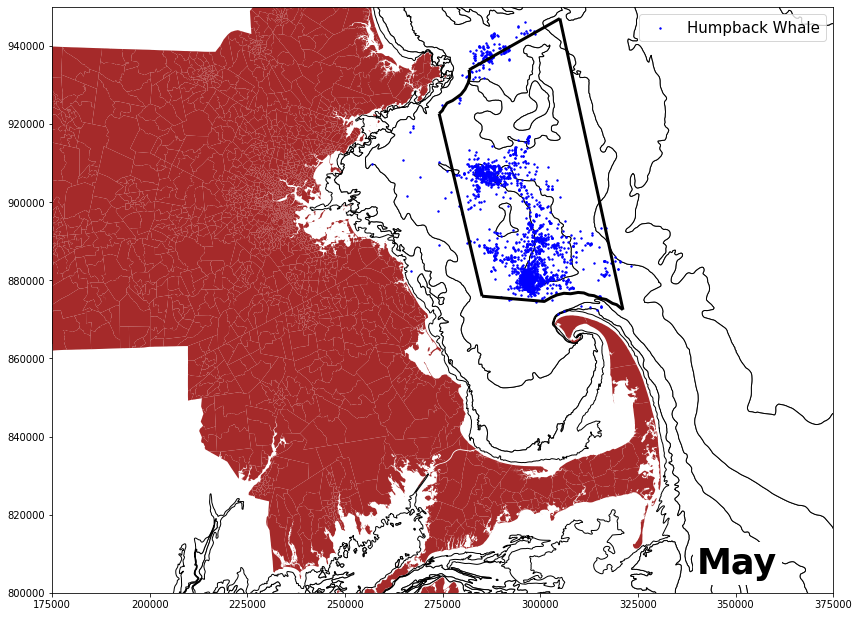

In [27]:
fg, ax =plt.subplots(figsize=(14,14))
ax.set_xlim(175000, 375000)
ax.set_ylim(800000, 950000)
Bathymetry.plot(ax=ax, facecolor="white", edgecolor='black')
Massachusetts.plot(ax=ax, facecolor="brown")
Stellwagen.plot(ax=ax, facecolor='none',edgecolor='black', linewidth=3.0)
geo_df05[geo_df05['Sp']=="MN"].plot(ax=ax, markersize=2, color="blue", marker="o", label="Humpback Whale")
#geo_ship_traffic04.plot(ax=ax, markersize=1, color="pink", marker=".", label="Average Ship traffic", alpha=.4)
plt.text(340000,805000, 'May', fontsize=35, backgroundcolor="white", weight="bold")
plt.legend(prop={'size': 15})

# June

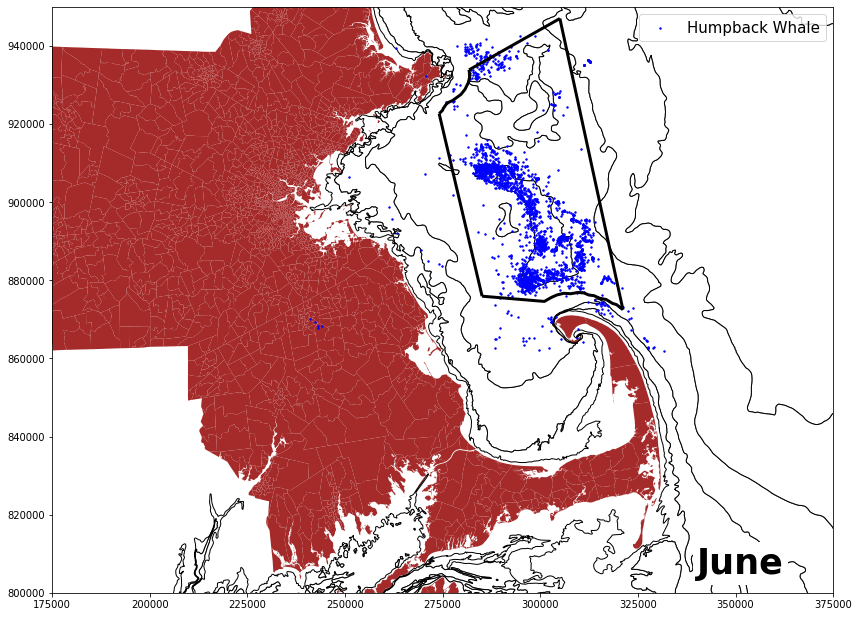

In [28]:
fg, ax =plt.subplots(figsize=(14,14))
ax.set_xlim(175000, 375000)
ax.set_ylim(800000, 950000)
Bathymetry.plot(ax=ax, facecolor="white", edgecolor='black')
Massachusetts.plot(ax=ax, facecolor="brown")
Stellwagen.plot(ax=ax, facecolor='none',edgecolor='black', linewidth=3.0)
geo_df06[geo_df06['Sp']=="MN"].plot(ax=ax, markersize=2, color="blue", marker="o", label="Humpback Whale")
#geo_ship_traffic04.plot(ax=ax, markersize=1, color="pink", marker=".", label="Average Ship traffic", alpha=.4)
plt.text(340000,805000, 'June', fontsize=35, backgroundcolor="white", weight="bold")
plt.legend(prop={'size': 15})

# July

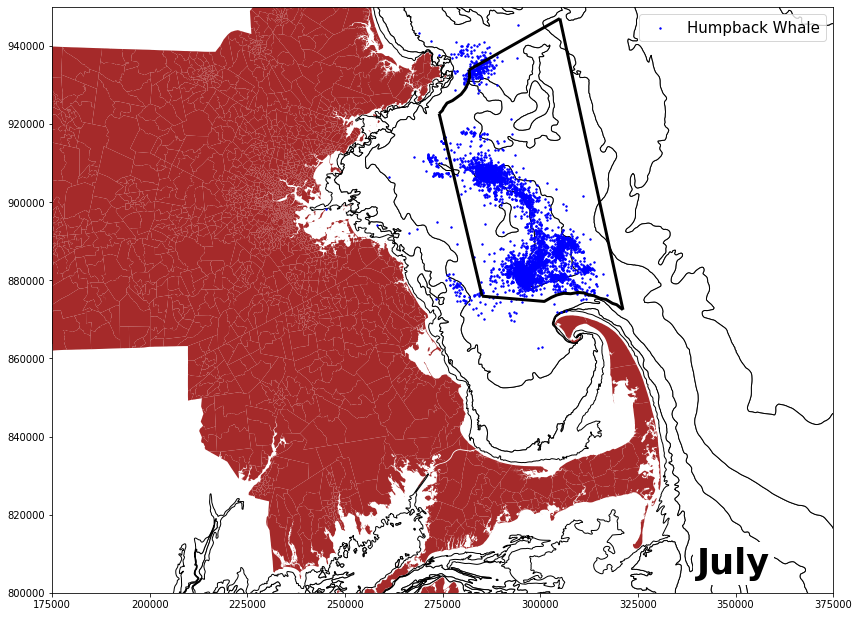

In [29]:
fg, ax =plt.subplots(figsize=(14,14))
ax.set_xlim(175000, 375000)
ax.set_ylim(800000, 950000)
Bathymetry.plot(ax=ax, facecolor="white", edgecolor='black')
Massachusetts.plot(ax=ax, facecolor="brown")
Stellwagen.plot(ax=ax, facecolor='none',edgecolor='black', linewidth=3.0)
geo_df07[geo_df07['Sp']=="MN"].plot(ax=ax, markersize=2, color="blue", marker="o", label="Humpback Whale")
#geo_ship_traffic04.plot(ax=ax, markersize=1, color="pink", marker=".", label="Average Ship traffic", alpha=.4)
plt.text(340000,805000, 'July', fontsize=35, backgroundcolor="white", weight="bold")
plt.legend(prop={'size': 15})

# August

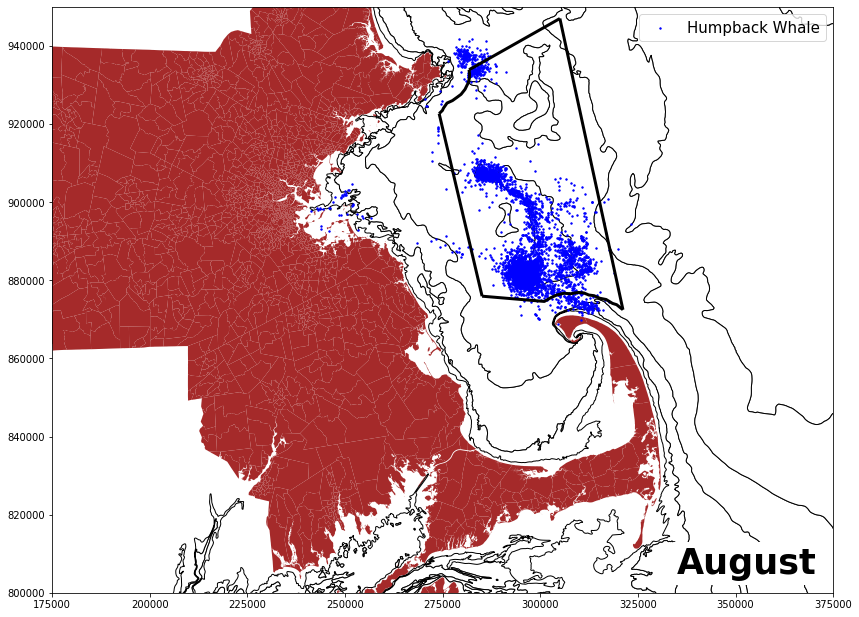

In [30]:
fg, ax =plt.subplots(figsize=(14,14))
ax.set_xlim(175000, 375000)
ax.set_ylim(800000, 950000)
Bathymetry.plot(ax=ax, facecolor="white", edgecolor='black')
Massachusetts.plot(ax=ax, facecolor="brown")
Stellwagen.plot(ax=ax, facecolor='none',edgecolor='black', linewidth=3.0)
geo_df08[geo_df08['Sp']=="MN"].plot(ax=ax, markersize=2, color="blue", marker="o", label="Humpback Whale")
#geo_ship_traffic04.plot(ax=ax, markersize=1, color="pink", marker=".", label="Average Ship traffic", alpha=.4)
plt.text(335000,805000, 'August', fontsize=35, backgroundcolor="white", weight="bold")
plt.legend(prop={'size': 15})

# September

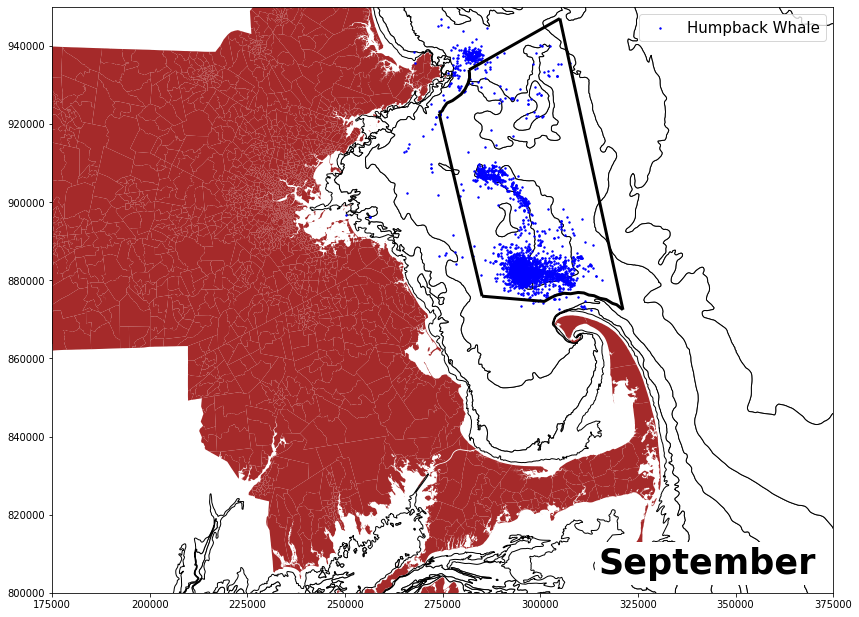

In [31]:
fg, ax =plt.subplots(figsize=(14,14))
ax.set_xlim(175000, 375000)
ax.set_ylim(800000, 950000)
Bathymetry.plot(ax=ax, facecolor="white", edgecolor='black')
Massachusetts.plot(ax=ax, facecolor="brown")
Stellwagen.plot(ax=ax, facecolor='none',edgecolor='black', linewidth=3.0)
geo_df09[geo_df09['Sp']=="MN"].plot(ax=ax, markersize=2, color="blue", marker="o", label="Humpback Whale")
#geo_ship_traffic04.plot(ax=ax, markersize=1, color="pink", marker=".", label="Average Ship traffic", alpha=.4)
plt.text(315000,805000, 'September', fontsize=35, backgroundcolor="white", weight="bold")
plt.legend(prop={'size': 15})

# October

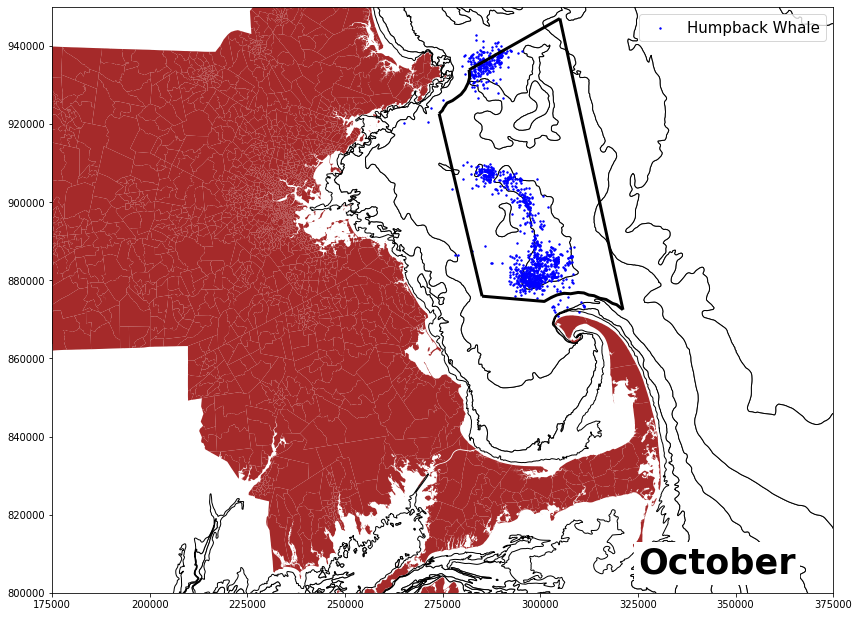

In [32]:
fg, ax =plt.subplots(figsize=(14,14))
ax.set_xlim(175000, 375000)
ax.set_ylim(800000, 950000)
Bathymetry.plot(ax=ax, facecolor="white", edgecolor='black')
Massachusetts.plot(ax=ax, facecolor="brown")
Stellwagen.plot(ax=ax, facecolor='none',edgecolor='black', linewidth=3.0)
geo_df10[geo_df10['Sp']=="MN"].plot(ax=ax, markersize=2, color="blue", marker="o", label="Humpback Whale")
#geo_ship_traffic04.plot(ax=ax, markersize=1, color="pink", marker=".", label="Average Ship traffic", alpha=.4)
plt.text(325000,805000, 'October', fontsize=35, backgroundcolor="white", weight="bold")
plt.legend(prop={'size': 15})

# November

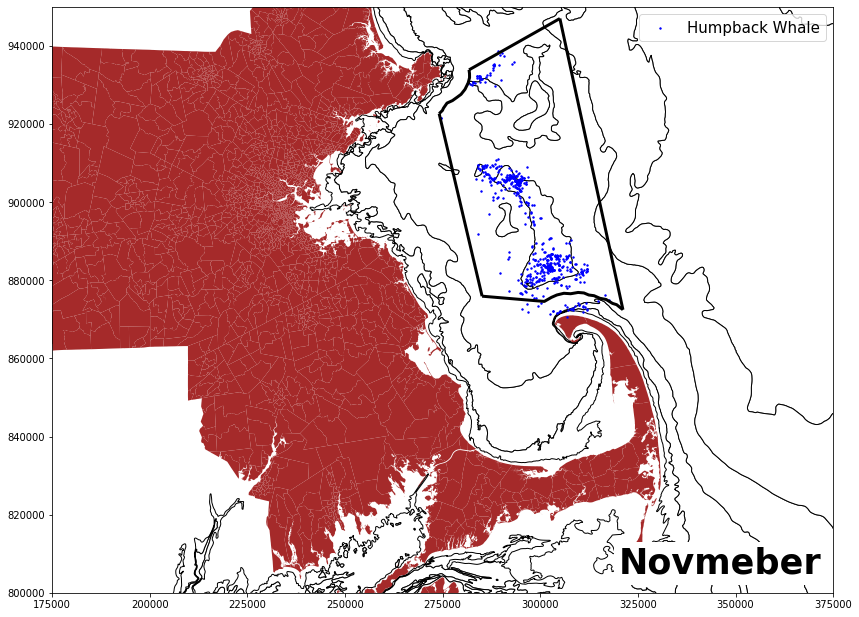

In [33]:
fg, ax =plt.subplots(figsize=(14,14))
ax.set_xlim(175000, 375000)
ax.set_ylim(800000, 950000)
Bathymetry.plot(ax=ax, facecolor="white", edgecolor='black')
Massachusetts.plot(ax=ax, facecolor="brown")
Stellwagen.plot(ax=ax, facecolor='none',edgecolor='black', linewidth=3.0)
geo_df11[geo_df11['Sp']=="MN"].plot(ax=ax, markersize=2, color="blue", marker="o", label="Humpback Whale")
#geo_ship_traffic04.plot(ax=ax, markersize=1, color="pink", marker=".", label="Average Ship traffic", alpha=.4)
plt.text(320000,805000, 'Novmeber', fontsize=35, backgroundcolor="white", weight="bold")
plt.legend(prop={'size': 15})